In [14]:
import sys
sys.path.append('../../src/models/')  # Add the path to the script

In [15]:
from train_logistic_regression import (
    load_data, vectorize_text, train_logistic_regression,
    evaluate_model, save_model_and_vectorizer
)

In [16]:
df = load_data('../../data/processed/cleaned_data.csv')
df = df.dropna(subset=['clean_text'])

In [17]:
X, tfidf = vectorize_text(df, max_features=1000)
y = df['label']

In [18]:
model_lr_xai = train_logistic_regression(X, y)

In [19]:
accuracy, report = evaluate_model(model_lr_xai, X, y)
print(f"Model Accuracy on Full Dataset: {round(accuracy, 2)}")
print("\nClassification Report:\n", report)

Model Accuracy on Full Dataset: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74    796302
           1       0.74      0.78      0.76    795668

    accuracy                           0.75   1591970
   macro avg       0.75      0.75      0.75   1591970
weighted avg       0.75      0.75      0.75   1591970



In [20]:
#Run Shapley on logistic regression (unscaled data)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import shap

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [27]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [28]:
explainer = shap.LinearExplainer(model_lr, X)

In [29]:
shap_values = explainer.shap_values(X)

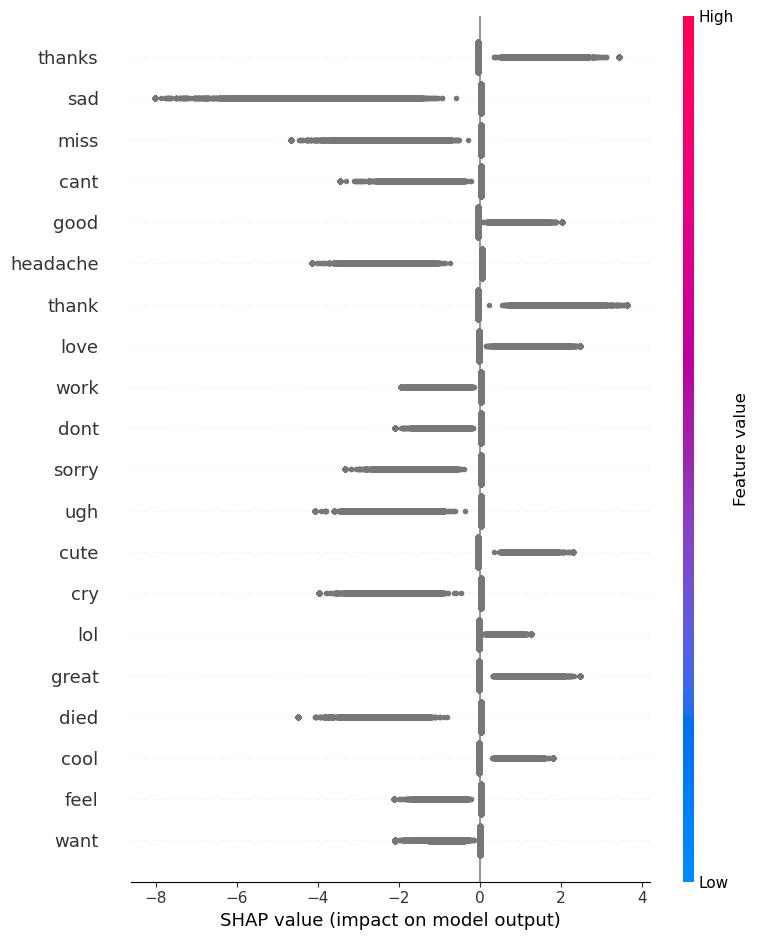

In [30]:
shap.summary_plot(shap_values, X, feature_names=tfidf.get_feature_names_out())